# Multi-scale histological image feature map extraction

In [1]:
import sys
from pathlib import Path
sys.path.append('/home/lixiaoyu/VISD')
from feature_extraction_offline import combined_feature_extraction

cache_dir = Path('/home/lixiaoyu/VISD/pretrain-model/cache/')
model_path = cache_dir / "MahmoodLab/UNI/pytorch_model.bin"
if not model_path.exists():
    raise FileNotFoundError(f"❌ Required model file not found at: {model_path}")

# ----- Source Domain Feature Extraction -----
try:
    print("🔍 Starting feature extraction for Source Domain...")
    source_prefix = '/home/lixiaoyu/VISD/data/MouseBrain-HD2V/SourceDomain/'
    source_result_prefix = '/home/lixiaoyu/VISD/result/MouseBrain-HD2V/SourceDomain/'
    combined_feature_extraction(source_prefix, source_result_prefix, cache_dir)
    print("✅ Source Domain feature extraction completed!\n")
except Exception as e:
    print(f"❌ Source Domain extraction failed: {e}\n")

# ----- Target Domain Feature Extraction -----
try:
    print("🔍 Starting feature extraction for Target Domain...")
    target_prefix = '/home/lixiaoyu/VISD/data/MouseBrain-HD2V/TargetDomain/'
    target_result_prefix = '/home/lixiaoyu/VISD/result/MouseBrain-HD2V/TargetDomain/'
    combined_feature_extraction(target_prefix, target_result_prefix, cache_dir)
    print("✅ Target Domain feature extraction completed!")
except Exception as e:
    print(f"❌ Target Domain extraction failed: {e}")


🔍 Starting feature extraction for Source Domain...
🔍 Loading image...
Image loaded from /home/lixiaoyu/VISD/data/MouseBrain-HD2V/SourceDomain/re_image.tif
🔧 Preparing model (offline mode)...


/home/lixiaoyu/VISD/feature_extraction_offline.py:101: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(os.path.join(local_model_dir, "pytorch_

📦 Splitting image into patches...
🧠 Extracting histological features...
🎨 Extracting RGB embeddings...
💡 Applying smoothing...
💾 Saving embeddings...
✅ Feature extraction complete. Saved to /home/lixiaoyu/VISD/result/MouseBrain-HD2V/SourceDomain/embeddings-hist.pickle
✅ Source Domain feature extraction completed!

🔍 Starting feature extraction for Target Domain...
🔍 Loading image...
Image loaded from /home/lixiaoyu/VISD/data/MouseBrain-HD2V/TargetDomain/re_image.tif
🔧 Preparing model (offline mode)...
📦 Splitting image into patches...
🧠 Extracting histological features...
🎨 Extracting RGB embeddings...
💡 Applying smoothing...
💾 Saving embeddings...
✅ Feature extraction complete. Saved to /home/lixiaoyu/VISD/result/MouseBrain-HD2V/TargetDomain/embeddings-hist.pickle
✅ Target Domain feature extraction completed!


# Inferring super resolution gene expression by VISD

In [2]:
from SR4Visium import get_data, SR4Visium
from utils.utils import read_string

# ==== Argpars ====
src_prefix = '/home/lixiaoyu/VISD/data/MouseBrain-HD2V/SourceDomain/'
tgt_prefix = '/home/lixiaoyu/VISD/data/MouseBrain-HD2V/TargetDomain/'
result_prefix = '/home/lixiaoyu/VISD/result/MouseBrain-HD2V/'

src_embs_prefix = result_prefix + Path(src_prefix).name + '/'
tgt_embs_prefix = result_prefix + Path(tgt_prefix).name + '/'

device = 'cuda'
epochs = 1000
n_states = 1
n_jobs = 1 
load_saved = False  
batch_size = 512

# ==== Load dataset ====
print("🔍 Loading source domain data...")
src_embs, src_cnts, src_locs, src_label, src_mask = get_data(src_prefix, src_embs_prefix, domain="Source")

print("🔍 Loading target domain data...")
tgt_embs, tgt_cnts, tgt_locs = get_data(tgt_prefix, tgt_embs_prefix, domain="Target")

radius = float(read_string(f'{src_prefix}radius.txt')) / 16

# ==== Inferring ====
print("🚀 Launching SR4Visium training and prediction...")
SR4Visium(
    src_embs=src_embs, src_cnts=src_cnts, src_locs=src_locs, src_labels=src_label,
    src_mask=src_mask, src_radius=radius,
    tgt_embs=tgt_embs, tgt_cnts=tgt_cnts, tgt_locs=tgt_locs, tgt_radius=radius,
    epochs=epochs, batch_size=batch_size,
    n_states=n_states, src_prefix=src_prefix, tgt_prefix=tgt_prefix,
    result_prefix=result_prefix,
    load_saved=load_saved, device=device, n_jobs=n_jobs
)


🔍 Loading source domain data...
Dataframe loaded from /home/lixiaoyu/VISD/data/MouseBrain-HD2V/SourceDomain/pseudo_st.csv for Source domain
Pickle loaded from /home/lixiaoyu/VISD/result/MouseBrain-HD2V/SourceDomain/embeddings-hist.pickle for Source domain
Dataframe loaded from /home/lixiaoyu/VISD/data/MouseBrain-HD2V/SourceDomain/pseudo_locs.csv for Source domain
Image loaded from /home/lixiaoyu/VISD/data/MouseBrain-HD2V/SourceDomain/re_image.tif
Pickle loaded from /home/lixiaoyu/VISD/data/MouseBrain-HD2V/SourceDomain/genes_3D.pkl for Source domain
Mask loaded from /home/lixiaoyu/VISD/data/MouseBrain-HD2V/SourceDomain/mask.png for Source domain
🔍 Loading target domain data...
Dataframe loaded from /home/lixiaoyu/VISD/data/MouseBrain-HD2V/TargetDomain/pseudo_st.csv for Target domain
Pickle loaded from /home/lixiaoyu/VISD/result/MouseBrain-HD2V/TargetDomain/embeddings-hist.pickle for Target domain
Dataframe loaded from /home/lixiaoyu/VISD/data/MouseBrain-HD2V/TargetDomain/pseudo_locs.csv

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA A100 80GB PCIe') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]
/home/lixiaoyu/miniconda3/envs/sr4v/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(

  | Name                   | Type                     | Params
--------------------------------------------------------------------
0 | src_gnn                | GNNRepresentationGraphST | 578 K 
1 | tgt_gnn                |

Training a new model...


/home/lixiaoyu/miniconda3/envs/sr4v/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:442: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 112 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Training: 0it [00:00, ?it/s]

/home/lixiaoyu/VISD/model/VISD.py:157: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  edge_index = torch.tensor([row, col], dtype=torch.long, device=device)
`Trainer.fit` stopped: `max_epochs=1000` reached.


Training time: 1296 sec
Model saved to /home/lixiaoyu/VISD/result/MouseBrain-HD2V/states/00/model.pt
/home/lixiaoyu/VISD/result/MouseBrain-HD2V/states/00/history.pickle
History saved to /home/lixiaoyu/VISD/result/MouseBrain-HD2V/states/00/history.pickle
Saved training history plot to /home/lixiaoyu/VISD/result/MouseBrain-HD2V/states/00/history.png
/home/lixiaoyu/VISD/result/MouseBrain-HD2V/cnts-super/Sox17.pickle
/home/lixiaoyu/VISD/result/MouseBrain-HD2V/cnts-super/Vxn.pickle
/home/lixiaoyu/VISD/result/MouseBrain-HD2V/cnts-super/Sulf1.pickle
/home/lixiaoyu/VISD/result/MouseBrain-HD2V/cnts-super/Khdc1a.pickle
/home/lixiaoyu/VISD/result/MouseBrain-HD2V/cnts-super/Kcnq5.pickle
/home/lixiaoyu/VISD/result/MouseBrain-HD2V/cnts-super/Col19a1.pickle
/home/lixiaoyu/VISD/result/MouseBrain-HD2V/cnts-super/Khdrbs2.pickle
/home/lixiaoyu/VISD/result/MouseBrain-HD2V/cnts-super/Nms.pickle
/home/lixiaoyu/VISD/result/MouseBrain-HD2V/cnts-super/Ecrg4.pickle
/home/lixiaoyu/VISD/result/MouseBrain-HD2V/cnt

# Compare HD-level predicted gene expression by VISD with Visium-level ground truth visualization


Image loaded from /home/lixiaoyu/VISD/data/MouseBrain-HD2V/TargetDomain/mask.png


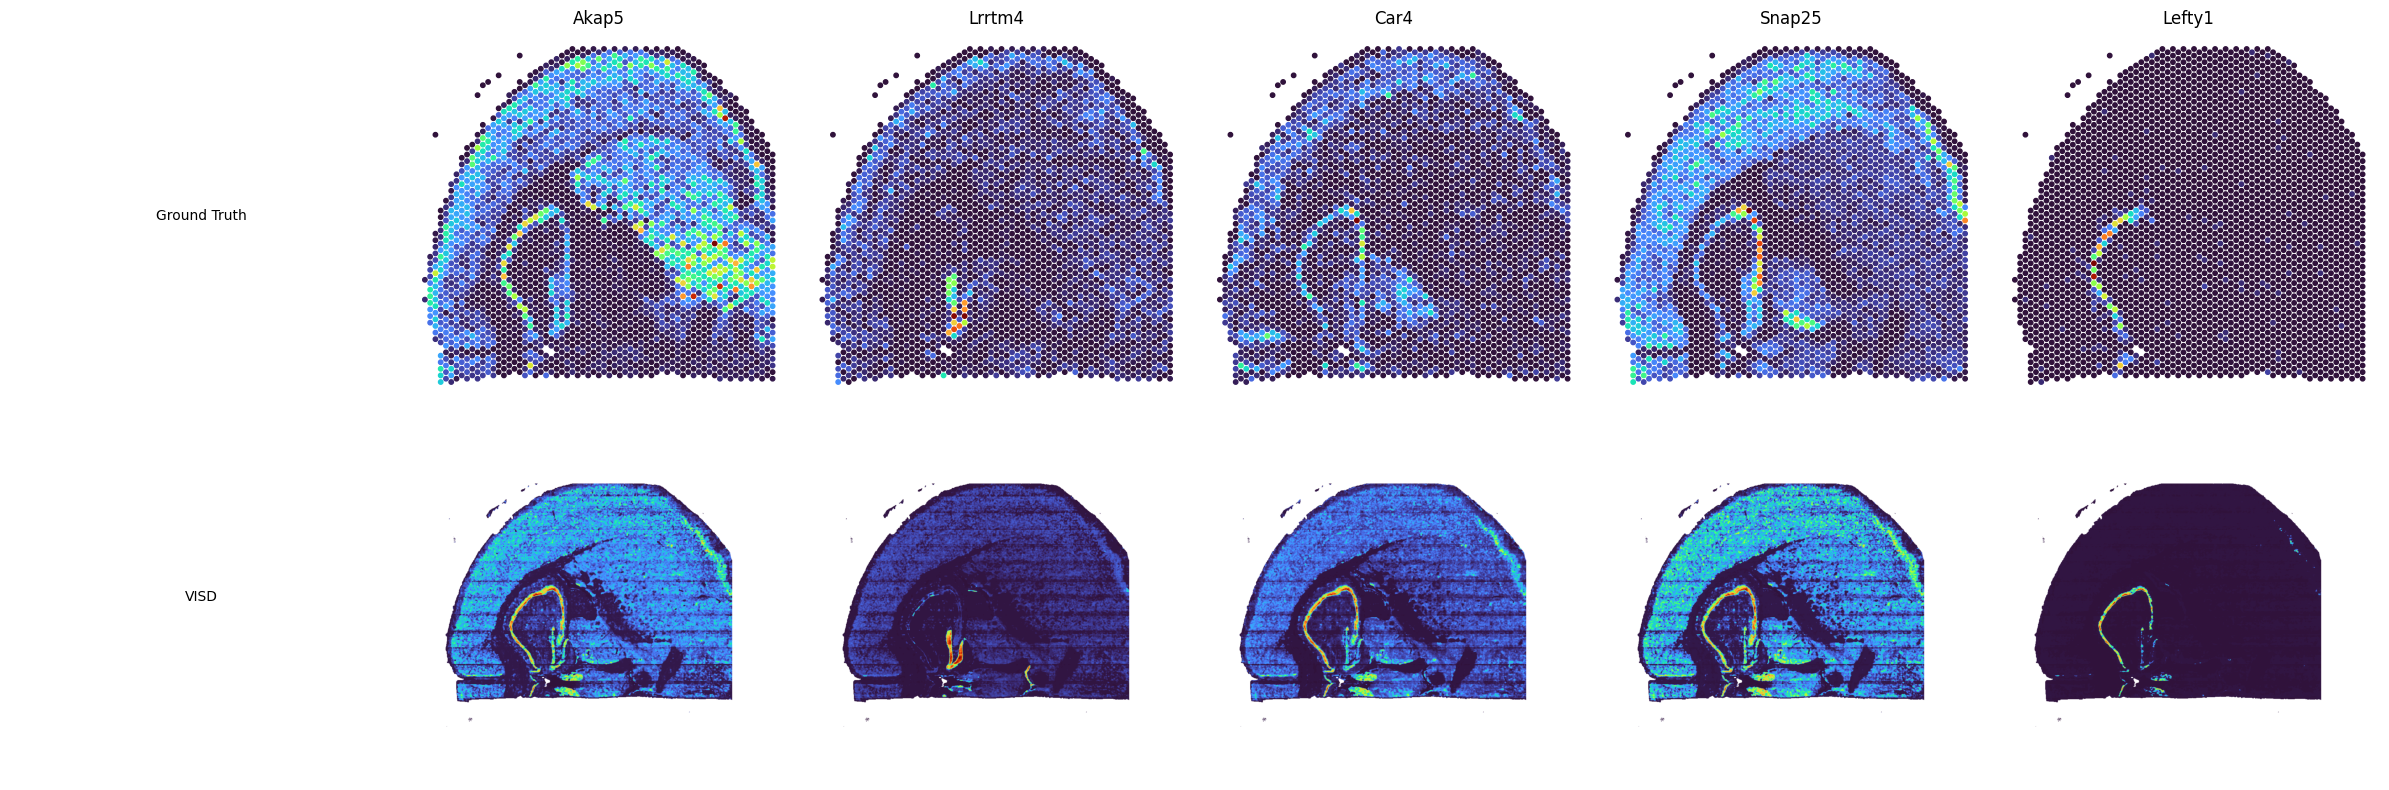

In [ ]:
%matplotlib inline

import sys
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd


plt.rcParams["font.size"] = 10

sys.path.append('/home/lixiaoyu/VISD')

from utils.utils import load_pickle, read_lines, load_image

data_prefix = '/home/lixiaoyu/VISD/data/MouseBrain-HD2V/TargetDomain/'
result_prefix = '/home/lixiaoyu/VISD/result/MouseBrain-HD2V/'
cnts_dir = Path(result_prefix) / 'cnts-super'

genes_to_plot = ["Akap5", "Lrrtm4", "Car4", "Snap25", "Lefty1"]

mask = load_image(f'{data_prefix}mask.png') > 0
if mask.ndim == 3:
    mask = mask[:, :, 0]

expression_df = pd.read_csv(data_prefix + "pseudo_st.csv", index_col=None)
coords_data = pd.read_csv(data_prefix + "pseudo_locs.csv", index_col=None).values

n_cols = len(genes_to_plot)
fig, axes = plt.subplots(2, n_cols + 1, figsize=(4 * (n_cols + 1), 8))

for col_idx, gene in enumerate(genes_to_plot):
    col = col_idx + 1

    # --- Real ---
    ax_true = axes[0, col]
    if gene in expression_df.columns:
        gene_vals = expression_df[gene].values.copy()
        coords = coords_data.copy()

        mask_valid = np.isfinite(gene_vals)
        gene_vals = gene_vals[mask_valid]
        coords = coords[mask_valid]

        gene_vals -= np.nanmin(gene_vals)
        gene_vals /= np.nanmax(gene_vals) + 1e-12
        ax_true.scatter(coords[:, 0], coords[:, 1], c=gene_vals, cmap='turbo', s=10)
        ax_true.set_title(gene)
        ax_true.axis('off')
    else:
        ax_true.text(0.5, 0.5, f"{gene}\nMissing", ha='center', va='center')
        ax_true.axis('off')

    # --- Predicted ---
    ax_pred = axes[1, col]
    try:
        cnts = load_pickle(cnts_dir / f"{gene}.pickle", verbose=False)
        h, w = np.minimum(cnts.shape[0], mask.shape[0]), np.minimum(cnts.shape[1], mask.shape[1])
        cnts = cnts[:h, :w]
        mask_crop = mask[:h, :w]
        cnts[~mask_crop] = np.nan

        valid = np.isfinite(cnts)
        cnts -= np.nanmin(cnts)
        cnts /= np.nanmax(cnts) + 1e-12
        img = plt.get_cmap('turbo')(cnts)[..., :3]
        img[~valid] = 1.0
        img = np.flipud(img)

        ax_pred.imshow(img)
        ax_pred.axis('off')
    except Exception as e:
        ax_pred.text(0.5, 0.5, f"Error\n{gene}", ha='center', va='center')
        ax_pred.axis('off')

# ==== Row labels ====
axes[0, 0].text(0.5, 0.5, "Ground Truth", ha='center', va='center', fontsize=10)
axes[1, 0].text(0.5, 0.5, "VISD", ha='center', va='center', fontsize=10)

for ax in [axes[0, 0], axes[1, 0]]:
    ax.axis('off')

plt.tight_layout()
plt.show()
